In [14]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time

# dl all data from data.gouv in 2023 in the department 31

In [3]:
url = 'https://files.data.gouv.fr/geo-dvf/latest/csv/2023/communes/31/'

In [11]:
download_folder = r'C:\Users\melan\Desktop\DeveloppementInfo\Portfolio\PortfolioData\House_Price_Toulouse\CSV'

In [13]:
response = requests.get(url)
response.raise_for_status()

In [15]:
soup = BeautifulSoup(response.content, 'html.parser')

In [17]:
csv_links = soup.find_all('a', href=True)
csv_links = [link for link in csv_links if link['href'].endswith('.csv')]

In [ ]:
for link in csv_links:
    file_url = urljoin(url, link['href'])
    file_name = os.path.basename(link['href'])
    file_path = os.path.join(download_folder, file_name)
    
    file_response = requests.get(file_url)
    file_response.raise_for_status()
    
    with open(file_path, 'wb') as file:
        file.write(file_response.content)
        
    print(f'Téléchargé : {file_name}')
    
print('Téléchargement terminé.')

## concate in one file 

In [29]:
dfs = []
for file_name in os.listdir(download_folder):
    if file_name.endswith('.csv'):
        file_path = os.path.join(download_folder, file_name)
        # Lire chaque fichier CSV et l'ajouter à la liste des DataFrames
        df = pd.read_csv(file_path)
        dfs.append(df)
        
concatenated_df = pd.concat(dfs, ignore_index=True)
output_file = os.path.join(download_folder, 'concatenated.csv')
concatenated_df.to_csv(output_file, index=False)

print(f'Tous les fichiers CSV ont été concaténés en : {output_file}')

Tous les fichiers CSV ont été concaténés en : C:\Users\melan\Desktop\DeveloppementInfo\Portfolio\PortfolioData\House_Price_Toulouse\CSV\concatenated.csv


## read csv

In [231]:
df = pd.read_csv("CSV/concatenated.csv")
df.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Maison,149.0,6.0,VI,vignes,NaN,NaN,1296.0,0.875032,43.36364
1,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,VI,vignes,NaN,NaN,1296.0,0.875032,43.36364
2,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,VI,vignes,NaN,NaN,1296.0,0.875032,43.36364
3,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Maison,149.0,6.0,AG,terrains d'agrément,PARC,Parc,750.0,0.875032,43.36364
4,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,AG,terrains d'agrément,PARC,Parc,750.0,0.875032,43.36364
5,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,AG,terrains d'agrément,PARC,Parc,750.0,0.875032,43.36364
6,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Maison,149.0,6.0,AG,terrains d'agrément,PARC,Parc,539.0,0.875032,43.36364
7,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,AG,terrains d'agrément,PARC,Parc,539.0,0.875032,43.36364
8,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Dépendance,NaN,0.0,AG,terrains d'agrément,PARC,Parc,539.0,0.875032,43.36364
9,2023-387434,2023-03-04,1,Vente,150000.0,62.0,A,BOIS DE BONSOM,B006,31230.0,...,Maison,149.0,6.0,J,jardins,NaN,NaN,756.0,0.875032,43.36364


In [153]:
len(df)

73135

## cleaning

### lines : keep only House and Appartment, drop the duplicate

In [233]:
df = df[(df.type_local=="Maison")|(df.type_local=="Appartement")].reset_index()

In [235]:
df.duplicated(subset=['id_mutation'])

0        False
1         True
2         True
3         True
4         True
         ...  
22570    False
22571     True
22572    False
22573    False
22574     True
Length: 22575, dtype: bool

In [237]:
df = df.drop_duplicates(subset=['id_mutation'])

In [239]:
df = df[df.nature_mutation=='Vente']

In [241]:
len(df)

18786

### columns : drop

In [243]:
df=df.dropna(axis=1, how='all')

In [245]:
df = df[['date_mutation','valeur_fonciere','code_postal','nom_commune','type_local','surface_reelle_bati','nombre_pieces_principales','nature_culture','nature_culture_speciale','surface_terrain']]

In [247]:
df

,date_mutation,valeur_fonciere,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
0,2023-03-04,150000.0,31230.0,Agassac,Maison,149.0,6.0,vignes,NaN,1296.0
5,2023-10-27,150000.0,31230.0,Agassac,Appartement,66.0,3.0,sols,NaN,359.0
7,2023-04-14,90000.0,31550.0,Aignes,Maison,36.0,1.0,sols,NaN,1758.0
8,2023-04-19,186570.0,31280.0,Aigrefeuille,Appartement,63.0,3.0,NaN,NaN,NaN
9,2023-04-24,845000.0,31280.0,Aigrefeuille,Maison,360.0,7.0,terrains d'agrément,Parc,1794.0
...,...,...,...,...,...,...,...,...,...,...
22567,2023-12-05,644700.0,31330.0,Larra,Maison,293.0,7.0,terres,NaN,35040.0
22568,2023-12-14,515100.0,31330.0,Larra,Appartement,159.0,4.0,terres,NaN,31425.0
22570,2023-12-26,453100.0,31330.0,Larra,Maison,139.0,6.0,sols,NaN,1500.0
22572,2023-02-14,120000.0,31230.0,Cazac,Maison,102.0,2.0,sols,NaN,1859.0


In [249]:
#reset_index
df = df.reset_index(drop=True)
df

,date_mutation,valeur_fonciere,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
0,2023-03-04,150000.0,31230.0,Agassac,Maison,149.0,6.0,vignes,NaN,1296.0
1,2023-10-27,150000.0,31230.0,Agassac,Appartement,66.0,3.0,sols,NaN,359.0
2,2023-04-14,90000.0,31550.0,Aignes,Maison,36.0,1.0,sols,NaN,1758.0
3,2023-04-19,186570.0,31280.0,Aigrefeuille,Appartement,63.0,3.0,NaN,NaN,NaN
4,2023-04-24,845000.0,31280.0,Aigrefeuille,Maison,360.0,7.0,terrains d'agrément,Parc,1794.0
...,...,...,...,...,...,...,...,...,...,...
18781,2023-12-05,644700.0,31330.0,Larra,Maison,293.0,7.0,terres,NaN,35040.0
18782,2023-12-14,515100.0,31330.0,Larra,Appartement,159.0,4.0,terres,NaN,31425.0
18783,2023-12-26,453100.0,31330.0,Larra,Maison,139.0,6.0,sols,NaN,1500.0
18784,2023-02-14,120000.0,31230.0,Cazac,Maison,102.0,2.0,sols,NaN,1859.0


In [ ]:
# separer année/mois
df.date_mutation = pd.to_datetime(df.date_mutation)

In [271]:
df.date_mutation.dtypes

dtype('<M8[ns]')

In [273]:
df.year = df.date_mutation.dt.year

C:\Users\melan\AppData\Local\Temp\ipykernel_24144\1311382442.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year = df.date_mutation.dt.year


In [ ]:
df

In [ ]:
# Séparer appartement et Maison


In [ ]:
# fusionner type_nature ? 


In [ ]:
### explo simple
# correlation
# distribution

In [ ]:
### feature engineering

In [ ]:
# outliers


In [ ]:
# données manquante


In [ ]:
# dummy ? 


## Analysis explo

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.corr(numeric_only = True)['valeur_fonciere'].sort_values()

In [216]:
df_final = df_final[df_final['nature_mutation'] == 'Vente']

In [218]:
df_maison = df_final[df_final.type_local == 'Maison']
df_appt = df_final[df_final.type_local == 'Appartement']

<Axes: xlabel='surface_reelle_bati', ylabel='valeur_fonciere'>

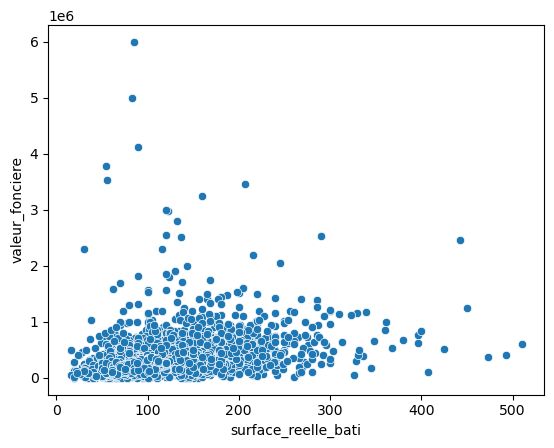

In [220]:
sns.scatterplot(data=df_maison, x='surface_reelle_bati',y='valeur_fonciere')

<Axes: xlabel='nombre_pieces_principales', ylabel='valeur_fonciere'>

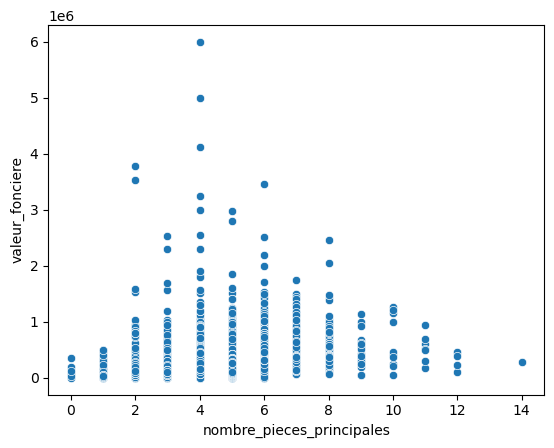

In [224]:
sns.scatterplot(data=df_maison, x='nombre_pieces_principales',y='valeur_fonciere')

In [230]:
df_appt_31400 = df_appt[df_appt['code_postal'] == 31400]

<Axes: xlabel='surface_reelle_bati', ylabel='valeur_fonciere'>

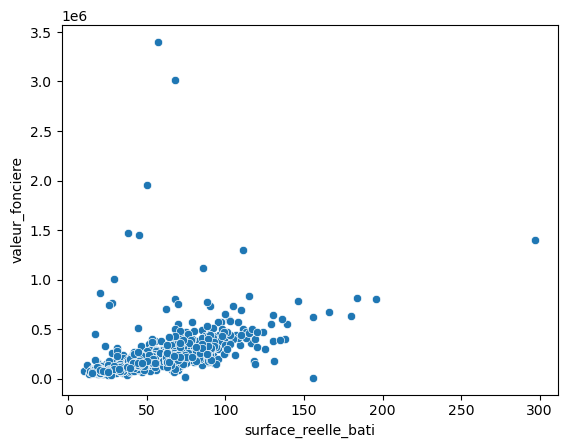

In [232]:
sns.scatterplot(data=df_appt_31400, x='surface_reelle_bati',y='valeur_fonciere')

In [234]:
def calculate_correlation(group):
    return group['valeur_fonciere'].corr(group['surface_reelle_bati'])

In [242]:
correlation_by_postal_code = df.groupby('code_postal').apply(calculate_correlation)

for code_postal, correlation in correlation_by_postal_code.items():
    if correlation > 0.75:
        print(f'Code Postal: {code_postal}, Corrélation: {correlation:.2f}')

Code Postal: 31180.0, Corrélation: 0.79
Code Postal: 31290.0, Corrélation: 0.94
Code Postal: 31540.0, Corrélation: 0.78
Code Postal: 31820.0, Corrélation: 0.85
Code Postal: 31840.0, Corrélation: 0.79
Code Postal: 31850.0, Corrélation: 0.88
Code Postal: 31870.0, Corrélation: 0.77
